In [11]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as splitter 
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error as mse 
import sklearn.metrics as metrics
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as confusion 


features = np.genfromtxt("./data.csv", delimiter=",", usecols=(1, 3, 4, 5))
target = np.genfromtxt("./data.csv", delimiter=",", usecols=8)
X = np.delete(features,[0], axis=0)
Y = np.delete(target, [0], axis=0)

# split data into train/test sets 
x_train, x_test, y_train, y_test = splitter(X, Y, test_size=0.25, random_state=0)

machine = SVC(kernel='poly', degree=3, random_state=0, gamma='auto', probability=True)
machine.fit(x_train, y_train)

score = machine.score(x_test, y_test)
print(score)

#used this:https://scikit-learn.org/stable/modules/svm.html
#and this:https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

0.9573333333333334


In [12]:
x_train, x_test, y_train, y_test = splitter(X, Y, test_size=0.25, random_state=0)

def cv(degree, folds):
    kf = KFold(n_splits=folds, shuffle=False)
    err = []

    for train_idx, test_idx in kf.split(x_train, y_train): 
        xtr_cv, xte_cv = x_train[train_idx], x_train[test_idx]
        ytr_cv, yte_cv = y_train[train_idx], y_train[test_idx]
        
        m = SVC(kernel='poly', degree=degree, random_state=0, gamma='auto')
        m.fit(xtr_cv, ytr_cv)
        yte_pred = m.predict(xte_cv)
        err.append(mse(yte_pred, yte_cv))
    
    return np.mean(err)

degree_counts = [3, 5]
cv_err = []
#for num in degree_counts: 
    #cv_err.append(cv(num, 5))
    
# calculate train/test error for various neuron count
train_err = []
test_err = []

'''
for num in degree_counts:
    m = SVC(kernel='poly', degree=num, random_state=0, gamma='auto')
    m.fit(x_train, y_train)
    
    tr_pred = m.predict(x_train)
    te_pred = m.predict(x_test)
    train_err.append(mse(tr_pred, y_train))
    test_err.append(mse(te_pred, y_test))
    
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(degree_counts, cv_err, 'r', degree_counts, train_err, 'b', degree_counts, test_err, 'g', linewidth=1)
plt.legend(['cross validation error', 'training error', 'test error'], loc='upper left')
'''

"\nfor num in degree_counts:\n    m = SVC(kernel='poly', degree=num, random_state=0, gamma='auto')\n    m.fit(x_train, y_train)\n    \n    tr_pred = m.predict(x_train)\n    te_pred = m.predict(x_test)\n    train_err.append(mse(tr_pred, y_train))\n    test_err.append(mse(te_pred, y_test))\n    \nplt.rcParams['figure.figsize'] = (15.0, 8.0)\nplt.semilogy(degree_counts, cv_err, 'r', degree_counts, train_err, 'b', degree_counts, test_err, 'g', linewidth=1)\nplt.legend(['cross validation error', 'training error', 'test error'], loc='upper left')\n"

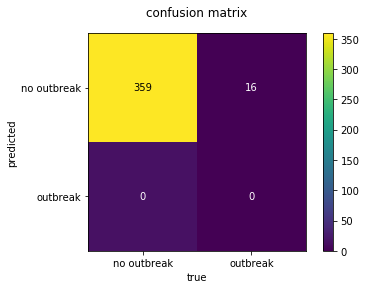

true negatives: 359
false positive: 0
false negatives: 16
true positive: 0


In [13]:
def plot_confusion_matrix():
    prediction = machine.predict(x_test)
    matrix = confusion(y_test, prediction, [0,1])
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    plt.title('confusion matrix')
    fig.colorbar(cax)
    
    ax.xaxis.tick_bottom()
    labels = ['no outbreak', 'outbreak']
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('true')
    plt.ylabel('predicted')

    plt.text(0, 0, str(matrix[0][0]), horizontalalignment="center", verticalalignment="center" ,color="black")
    plt.text(0, 1, str(matrix[0][1]), horizontalalignment="center", verticalalignment="center" ,color="white")
    plt.text(1, 0, str(matrix[1][0]), horizontalalignment="center", verticalalignment="center" ,color="white")
    plt.text(1, 1, str(matrix[1][1]), horizontalalignment="center", verticalalignment="center" ,color="white")
    plt.show()
    
    print('true negatives: {}'.format(matrix[0][0]))
    print('false positive: {}'.format(matrix[0][1]))
    print('false negatives: {}'.format(matrix[1][0]))
    print('true positive: {}'.format(matrix[1][1]))

plot_confusion_matrix()

#used this:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#and this:https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785

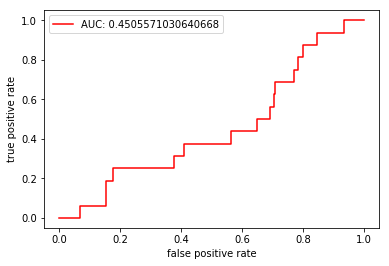

In [14]:
def plot_roc():
    probs = machine.predict_proba(x_test)[:,1]
    fpr, tpr, thresh = metrics.roc_curve(y_test, probs)
    auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, c='r', label='AUC: {}'.format(auc))
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    
    plt.legend()
    plt.show()
    
plot_roc()

#looked at this for roc:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html